In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding the Dataset

## Loading the Data

In [5]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis

In [6]:
df.shape

(253680, 22)

In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [12]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


A lot of these features are actually categorical which are being treated as numerical. We need to convert them to categorical

In [13]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
df.duplicated().sum()

23899

There are 23899 rows which are duplicated, we need to drop these rows.

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

array([[<AxesSubplot: title={'center': 'Diabetes_012'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubplot

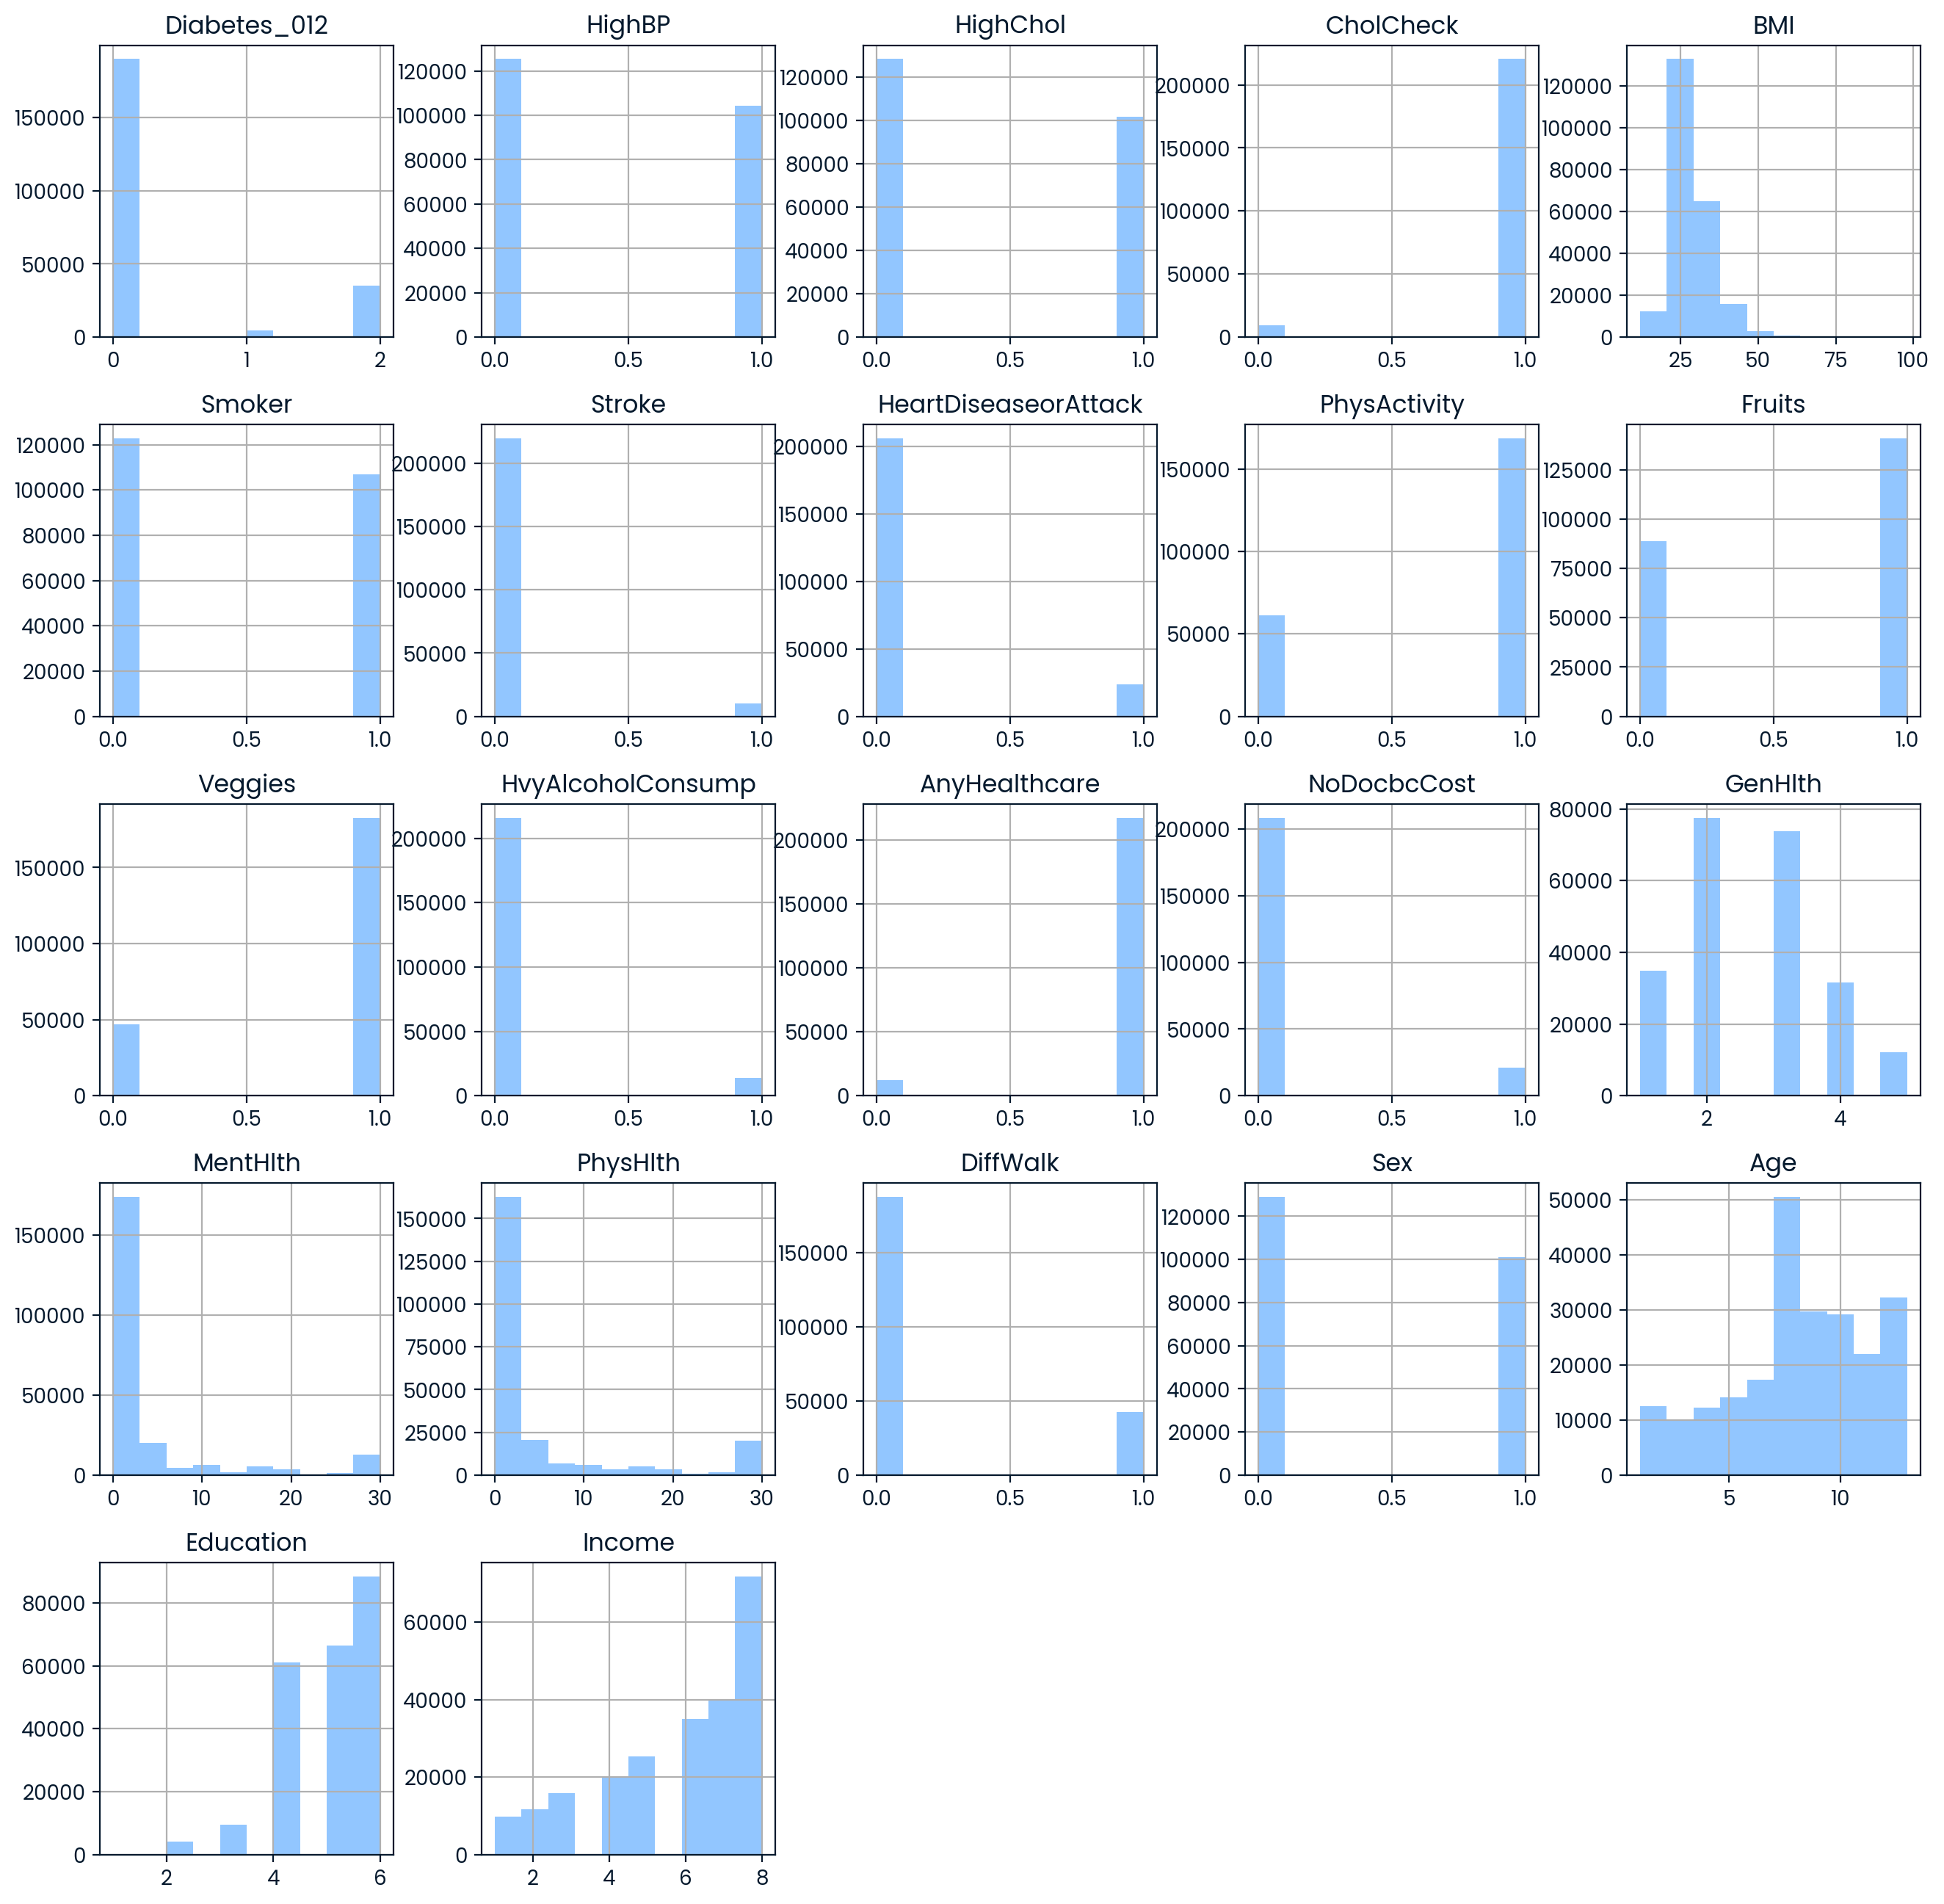

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df.hist(figsize=(16, 16))

<AxesSubplot: title={'center': 'Correlation with Diabetes Column'}>

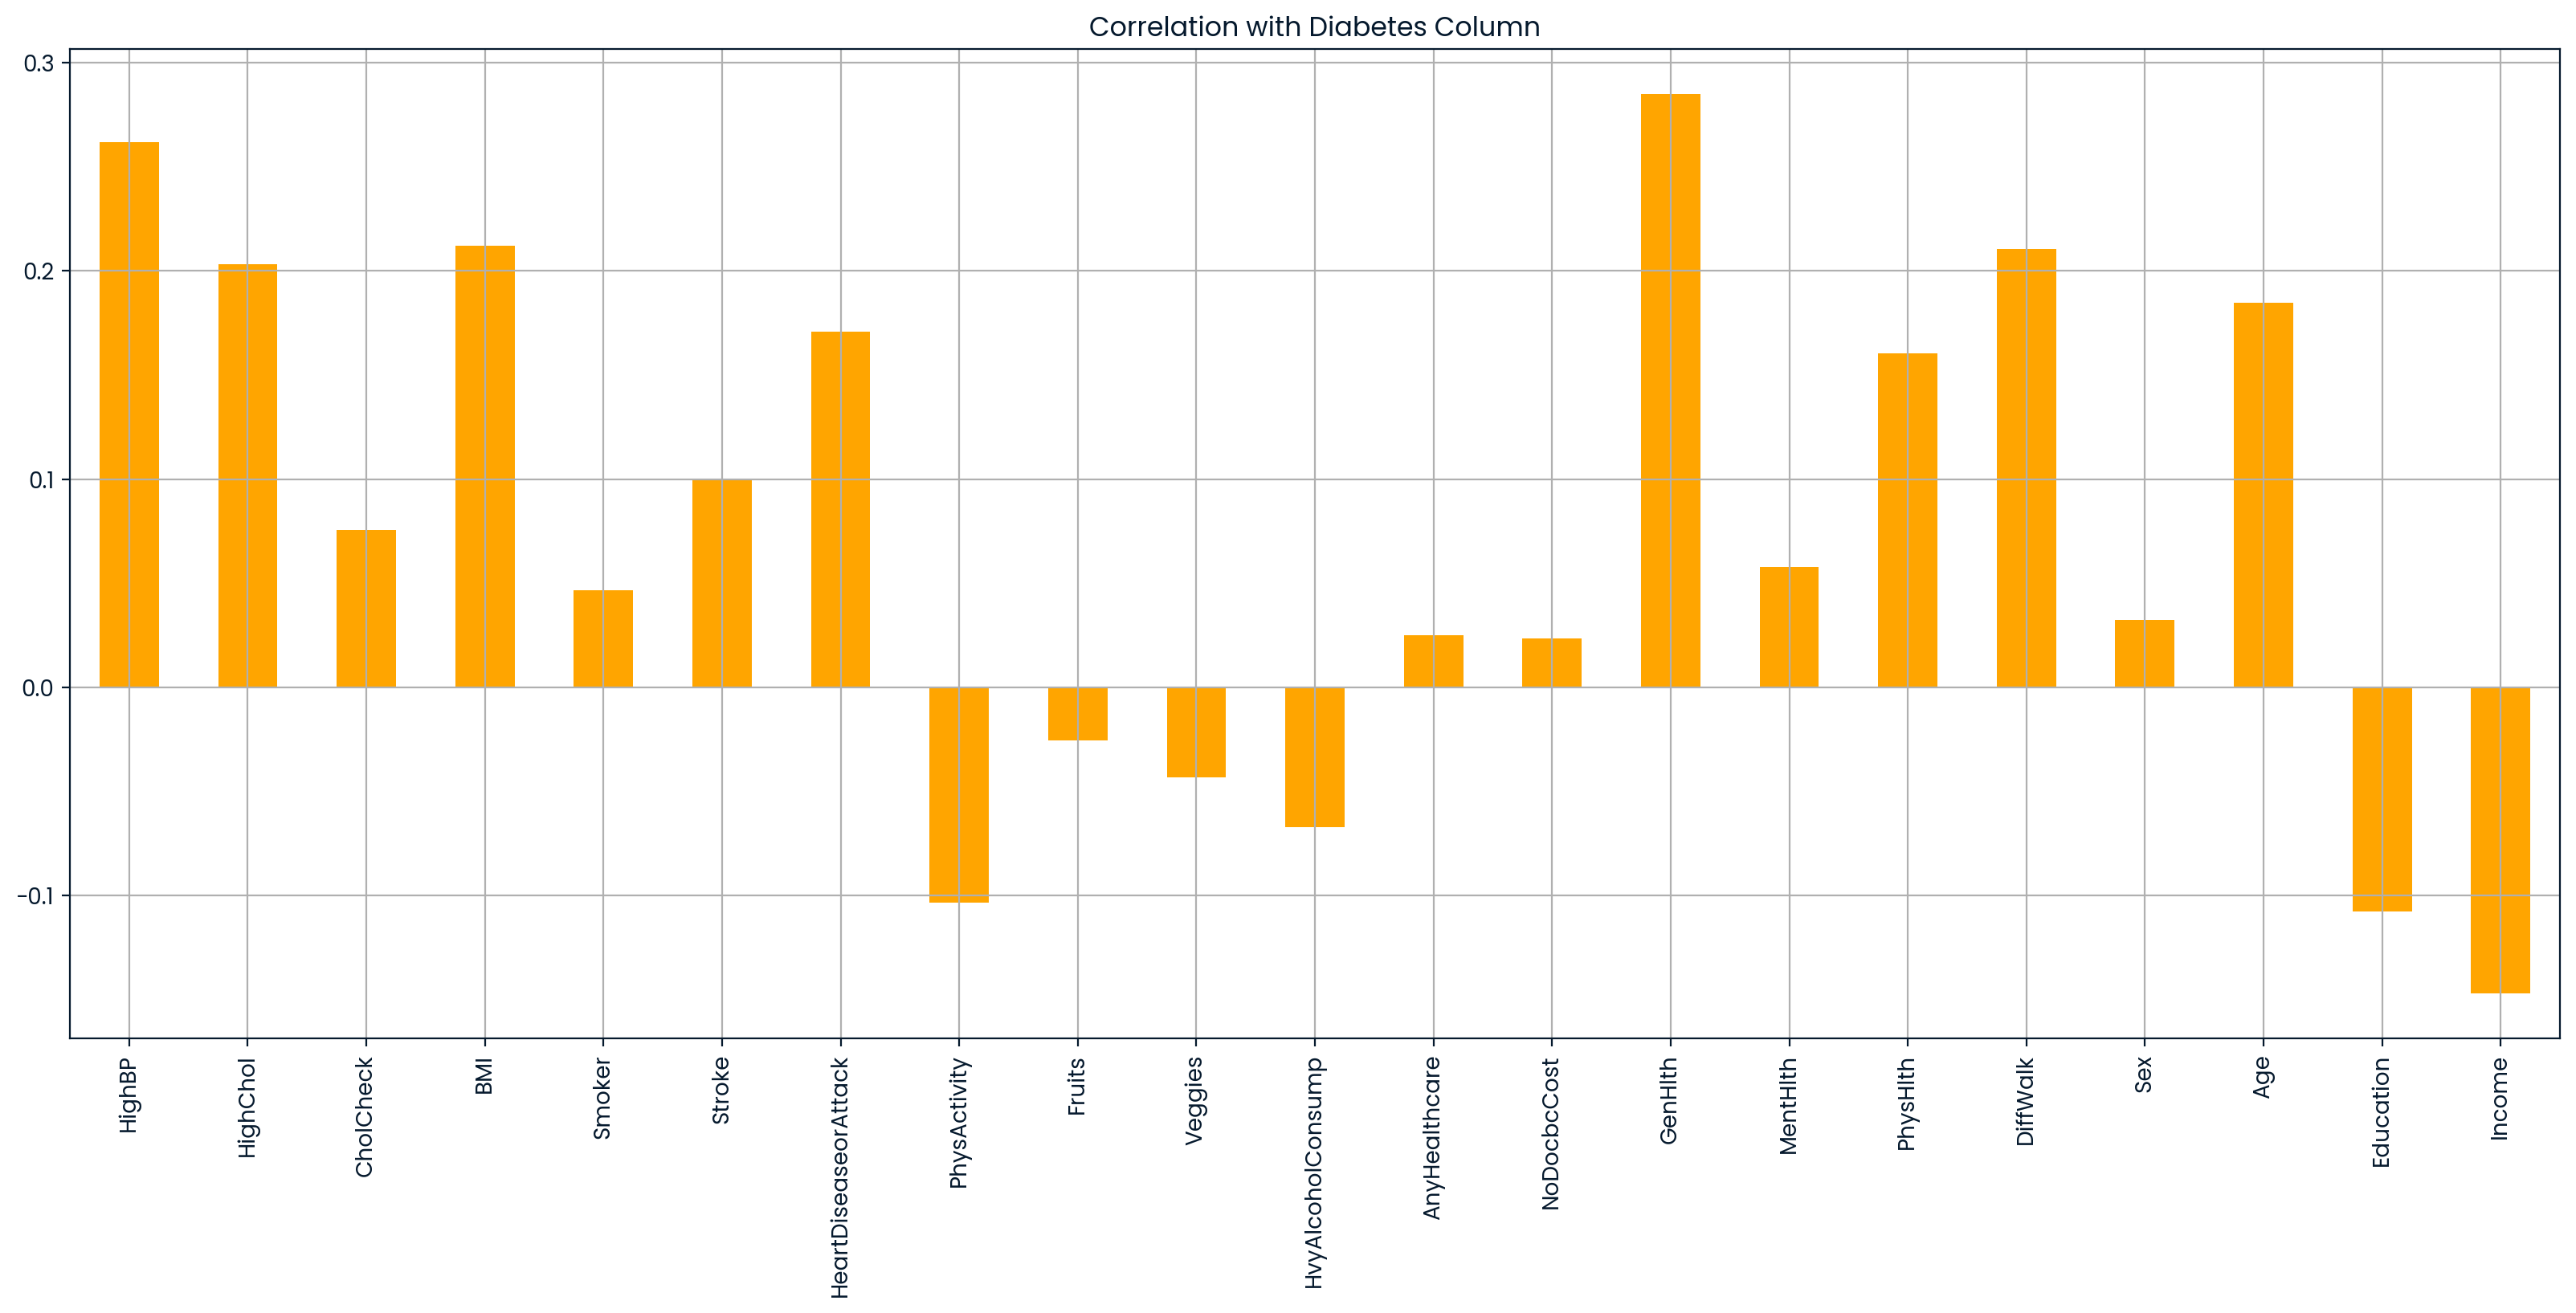

In [17]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Column", color='orange')

The considerable correlations with Diabetes column are General Health (1-5), Physical Health, BMI and High BP

<AxesSubplot: xlabel='Diabetes_012', ylabel='count'>

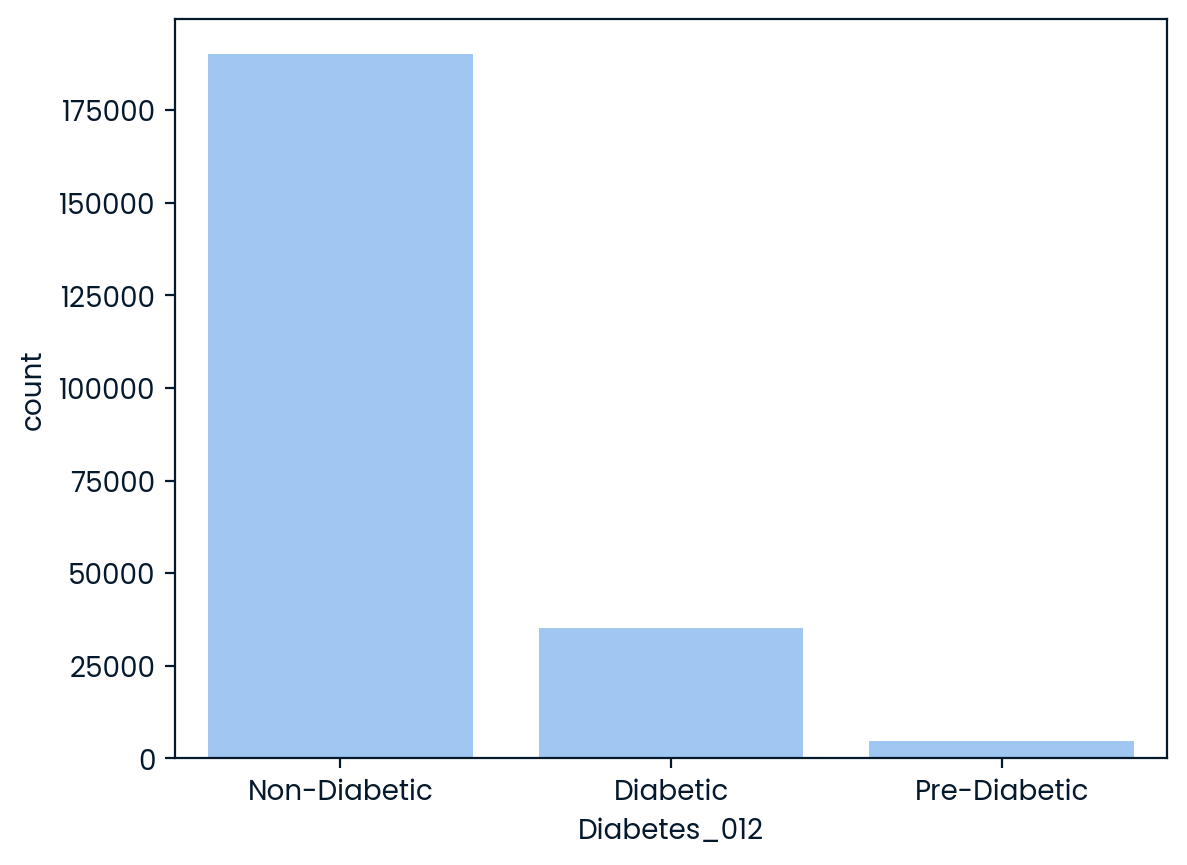

In [18]:
df.Diabetes_012 = df.Diabetes_012.replace({0: 'Non-Diabetic', 1: 'Pre-Diabetic', 2: 'Diabetic'})

sns.countplot(data=df, x='Diabetes_012')

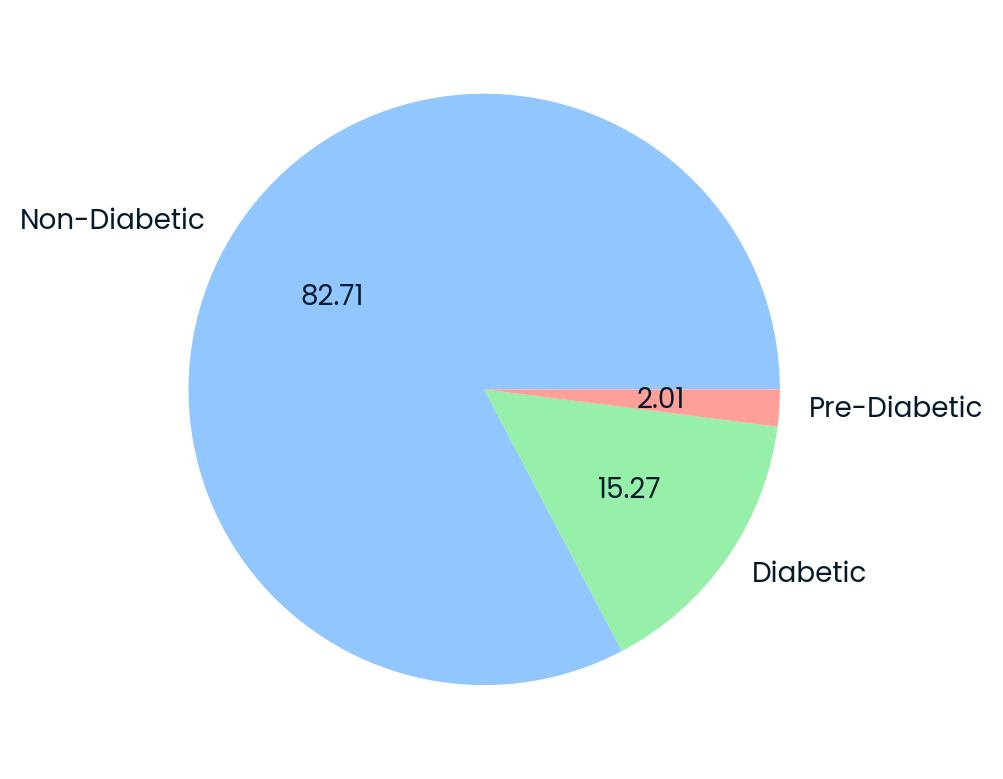

In [19]:
labels=['Non-Diabetic', 'Diabetic', 'Pre-Diabetic']
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels, autopct='%.02f' );

There is high class imbalance. To be precise we need to run value_counts method.

In [20]:
df.Diabetes_012.value_counts()

Non-Diabetic    190055
Diabetic         35097
Pre-Diabetic      4629
Name: Diabetes_012, dtype: int64

## Converting Discrete Features in Categories

In [21]:
binary_columns = df.columns[(df.nunique() == 2)].tolist()
binary_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [22]:
df[binary_columns] = df[binary_columns].astype(int)

### HighBP relation with Diabetes012

<Figure size 800x600 with 0 Axes>

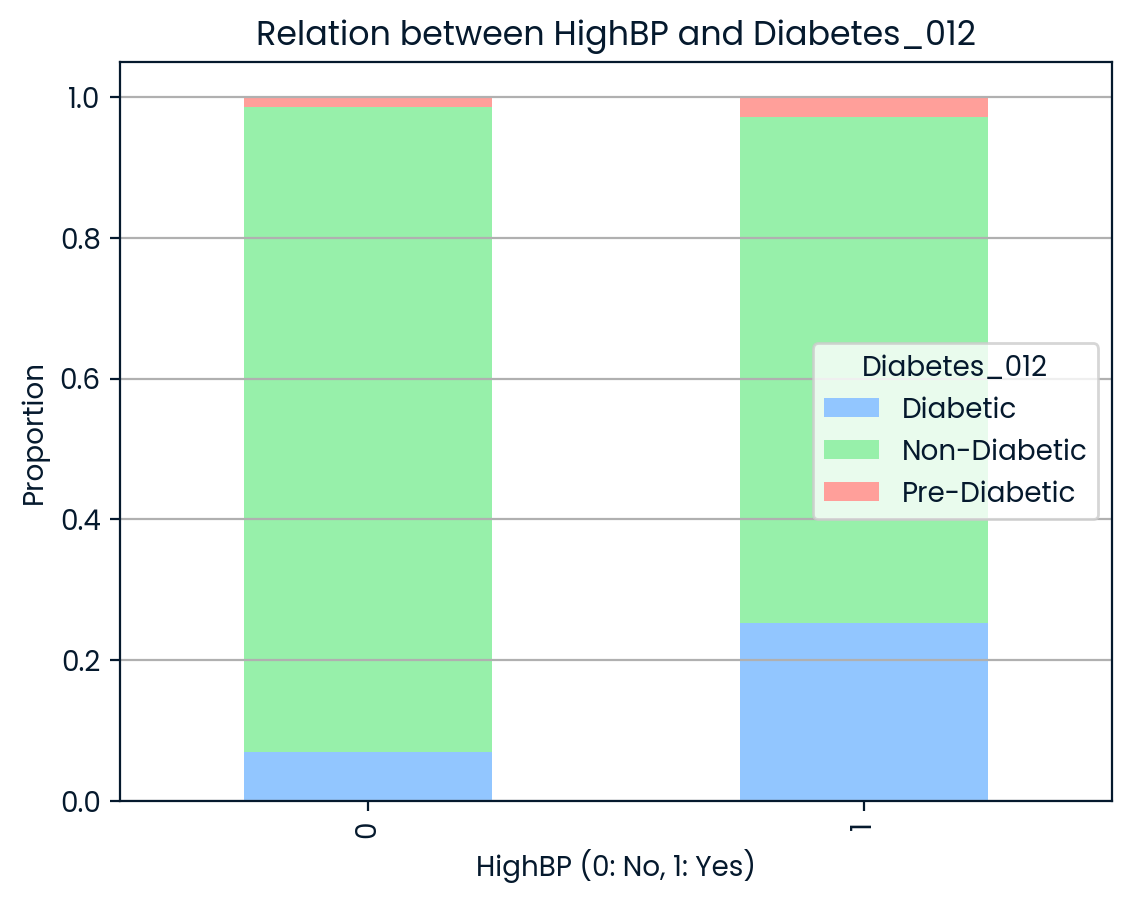

In [23]:
plt.figure(figsize=(8, 6))
bp_diabetes_relation = pd.crosstab(df['HighBP'], df['Diabetes_012'], normalize='index')
bp_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relation between HighBP and Diabetes_012')
plt.xlabel('HighBP (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

It can clearly be seen that High BP is somehow the source of Diabetes from the plot above.

### HighChol Relation with Diabetes

<Figure size 800x600 with 0 Axes>

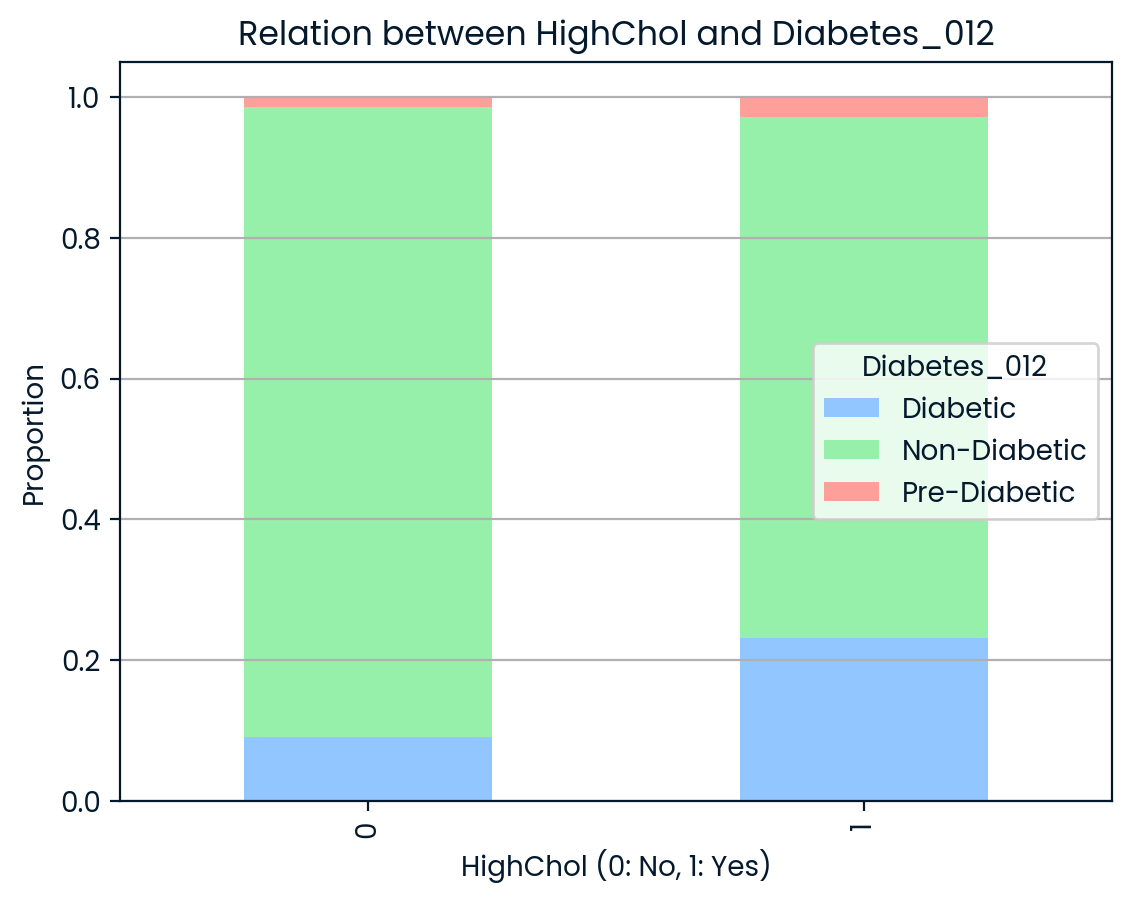

In [24]:
plt.figure(figsize=(8, 6))
chol_diabetes_relation = pd.crosstab(df['HighChol'], df['Diabetes_012'], normalize='index')
chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relation between HighChol and Diabetes_012')
plt.xlabel('HighChol (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

Same goes for High Cholestrol, Patients with high cholestrol considerably have diabetes or are pre diabetic

### Combined Effect of High BP and High Cholestrol

<Figure size 1000x600 with 0 Axes>

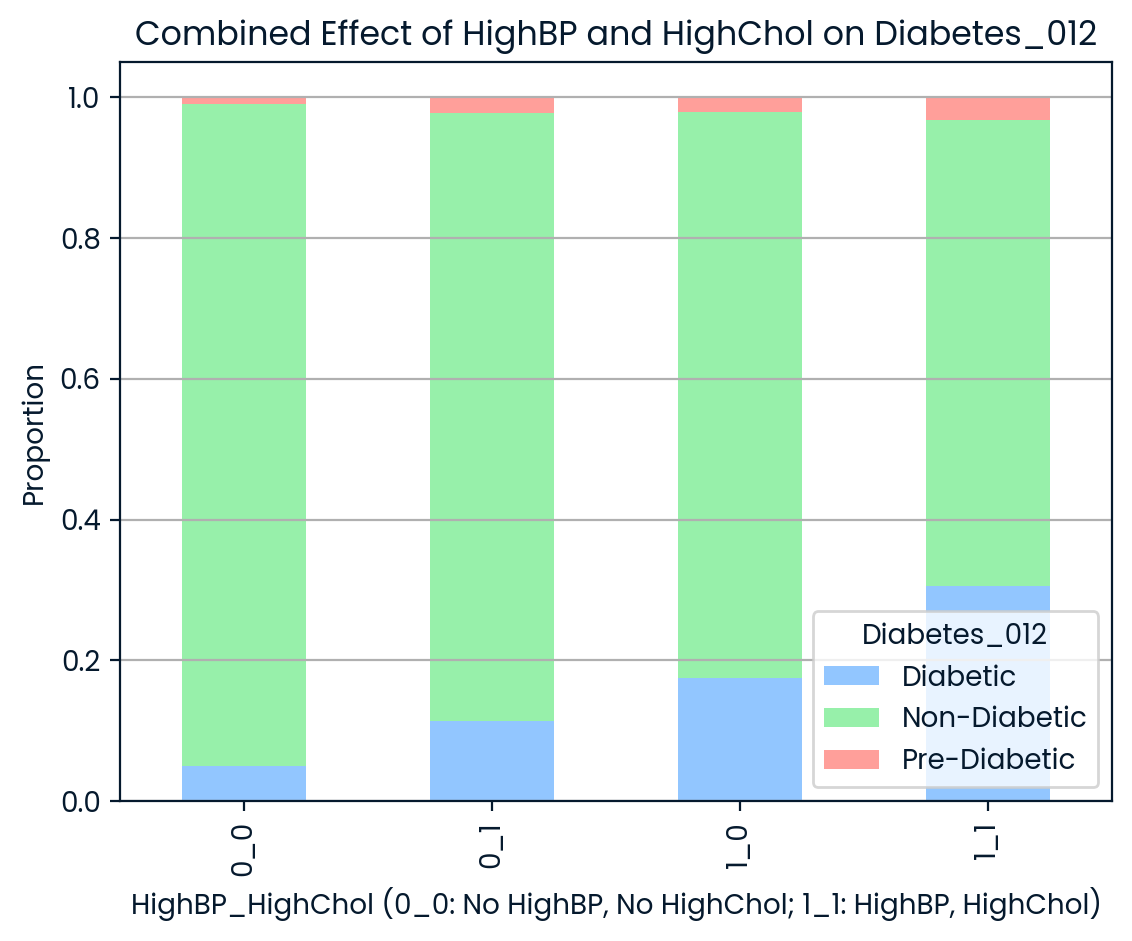

In [25]:
# df['HighBP_HighChol'] = df['HighBP'].astype(str) + "_" + df['HighChol'].astype(str)

# Plot the combined effect
plt.figure(figsize=(10, 6))
bp_chol_diabetes_relation = pd.crosstab(df['HighBP'].astype(str) + "_" + df['HighChol'].astype(str), df['Diabetes_012'], normalize='index')
bp_chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Combined Effect of HighBP and HighChol on Diabetes_012')
plt.xlabel('HighBP_HighChol (0_0: No HighBP, No HighChol; 1_1: HighBP, HighChol)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

The combined effect of High Blood Pressure and High Cholestrol can be seen from the plot above.

### BMI and Diabetes Relation

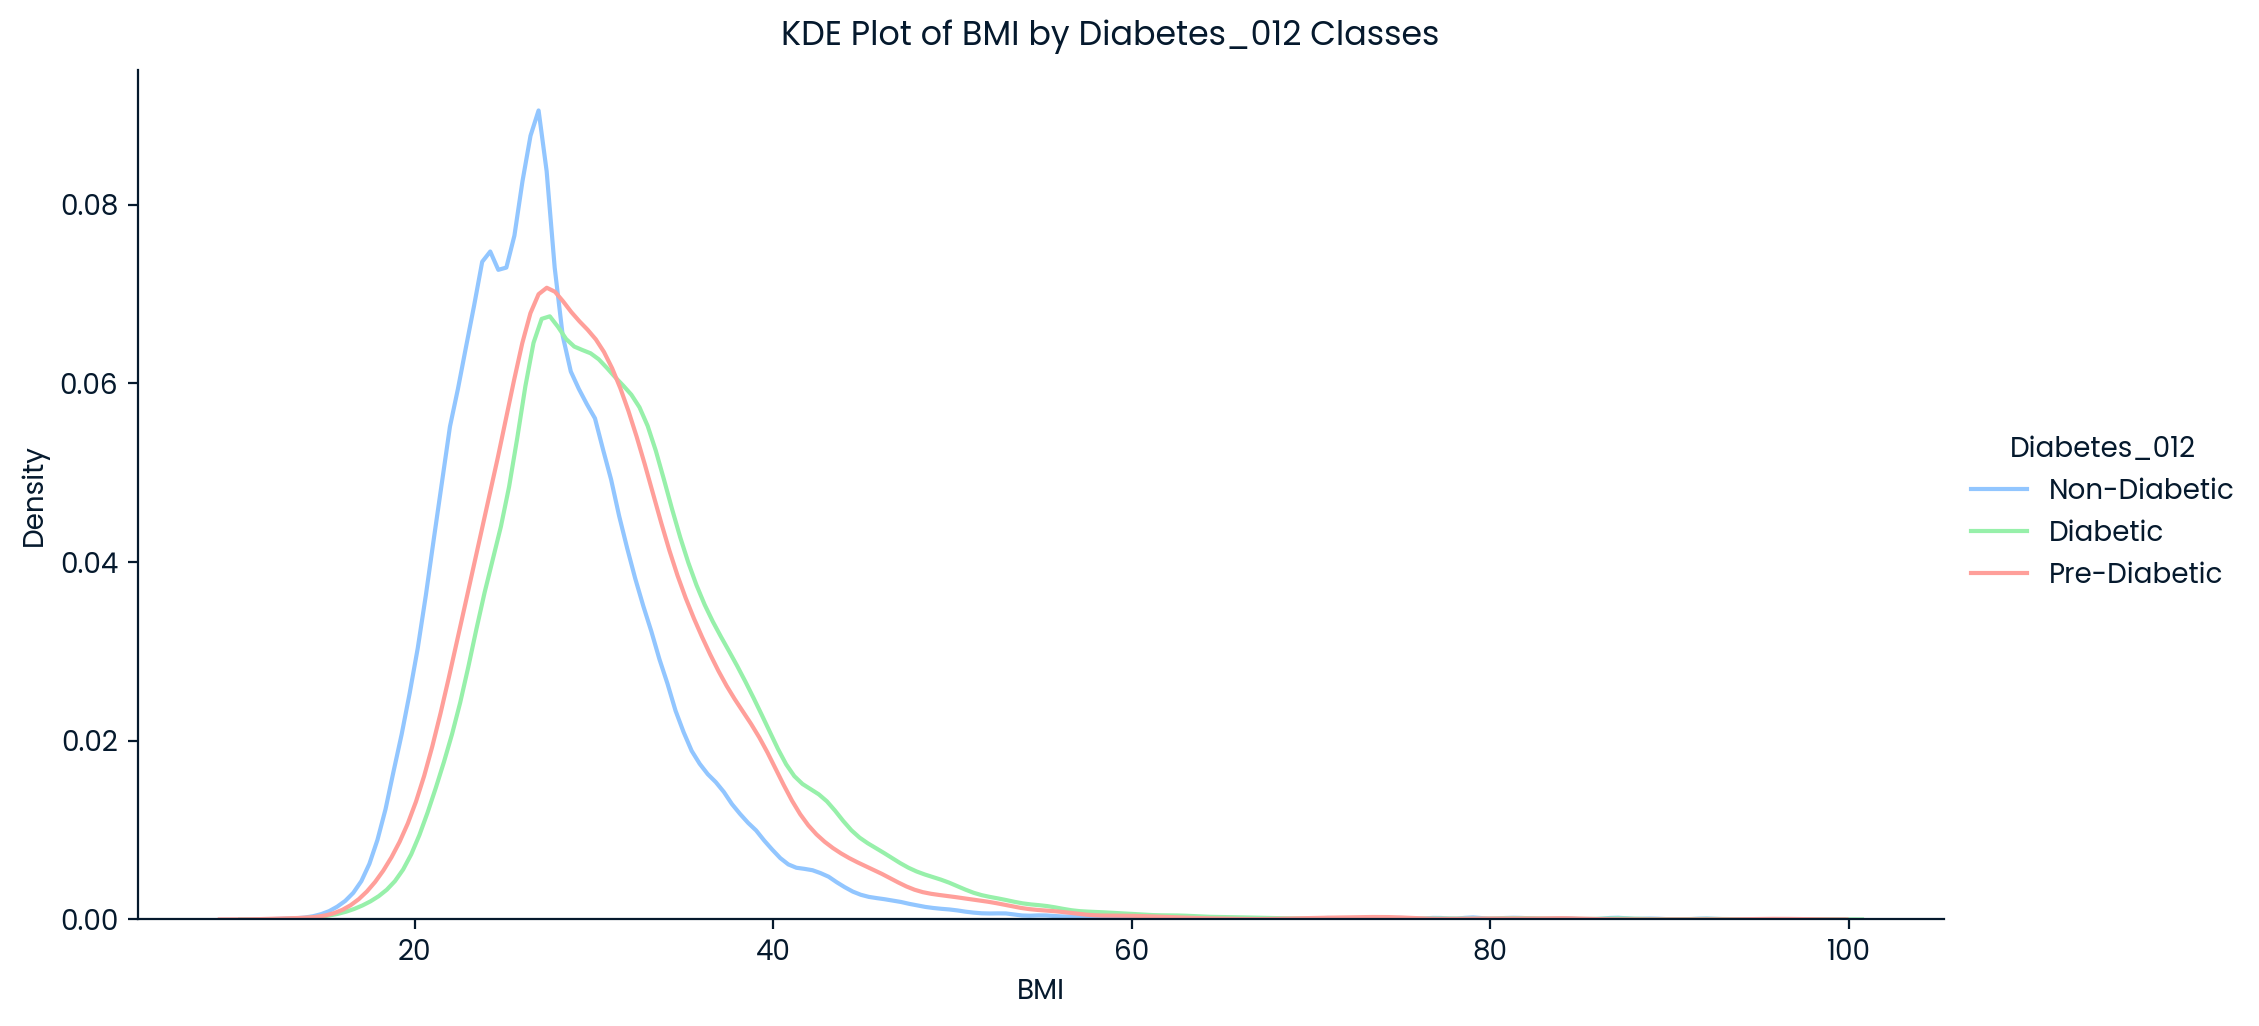

In [26]:
g = sns.FacetGrid(df, hue="Diabetes_012", height=5, aspect=2)
g.map(sns.kdeplot, "BMI").add_legend()
g.set_axis_labels("BMI", "Density")
g.fig.suptitle('KDE Plot of BMI by Diabetes_012 Classes', y=1.02)
plt.show()

The plot suggest that DIabetic and Pre-Diabetic have slightly higher BMI than Non-Diabetic People.

### Smoker's relation with Diabetes_binary

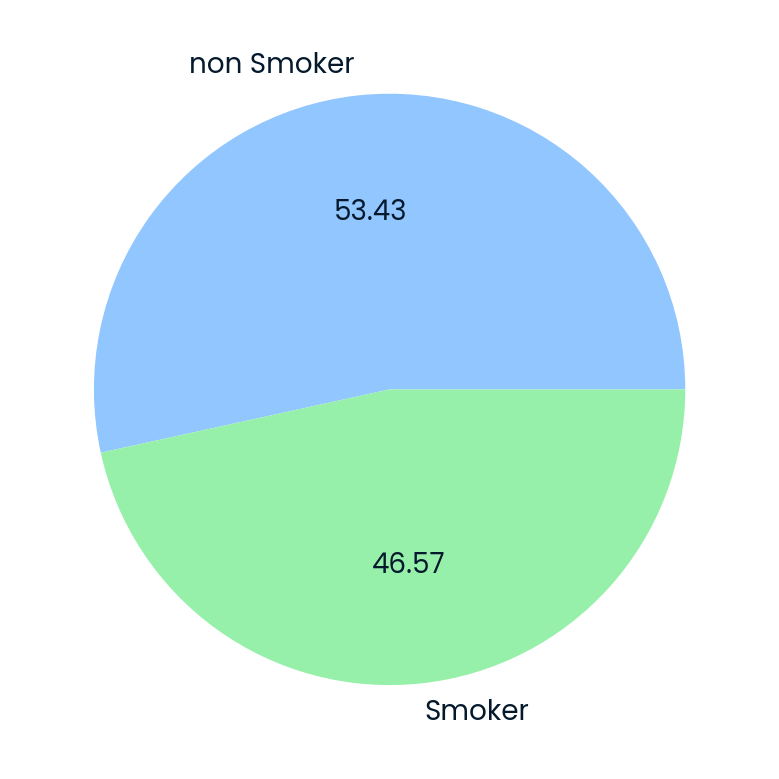

In [27]:
labels=["non Smoker","Smoker"]

plt.pie(df["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );

The distribution seems balanced. Let's check smoking influence on Diabetes

<Figure size 800x600 with 0 Axes>

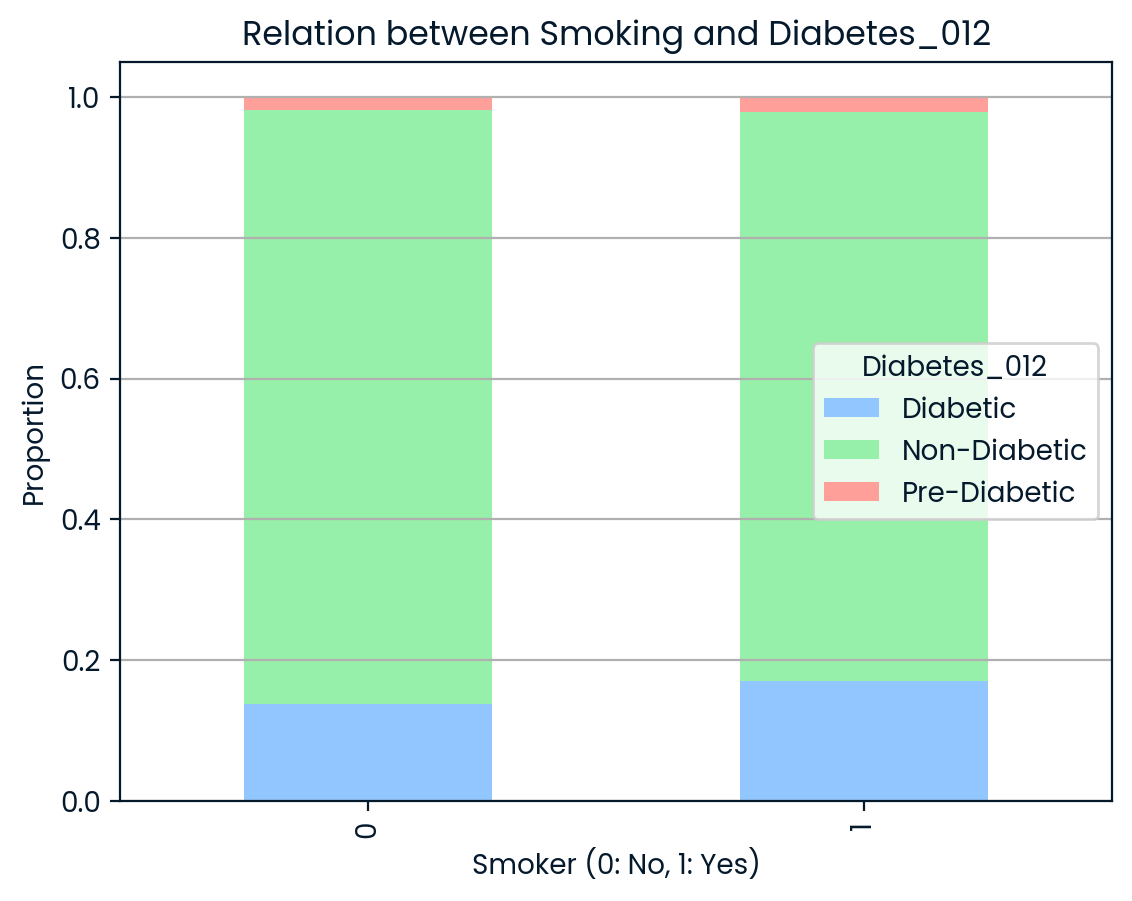

In [28]:
plt.figure(figsize=(8, 6))
chol_diabetes_relation = pd.crosstab(df['Smoker'], df['Diabetes_012'], normalize='index')
chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relation between Smoking and Diabetes_012')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

There is a very slight relation between the two quantities.

### Stroke and Heart Disease Influence

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

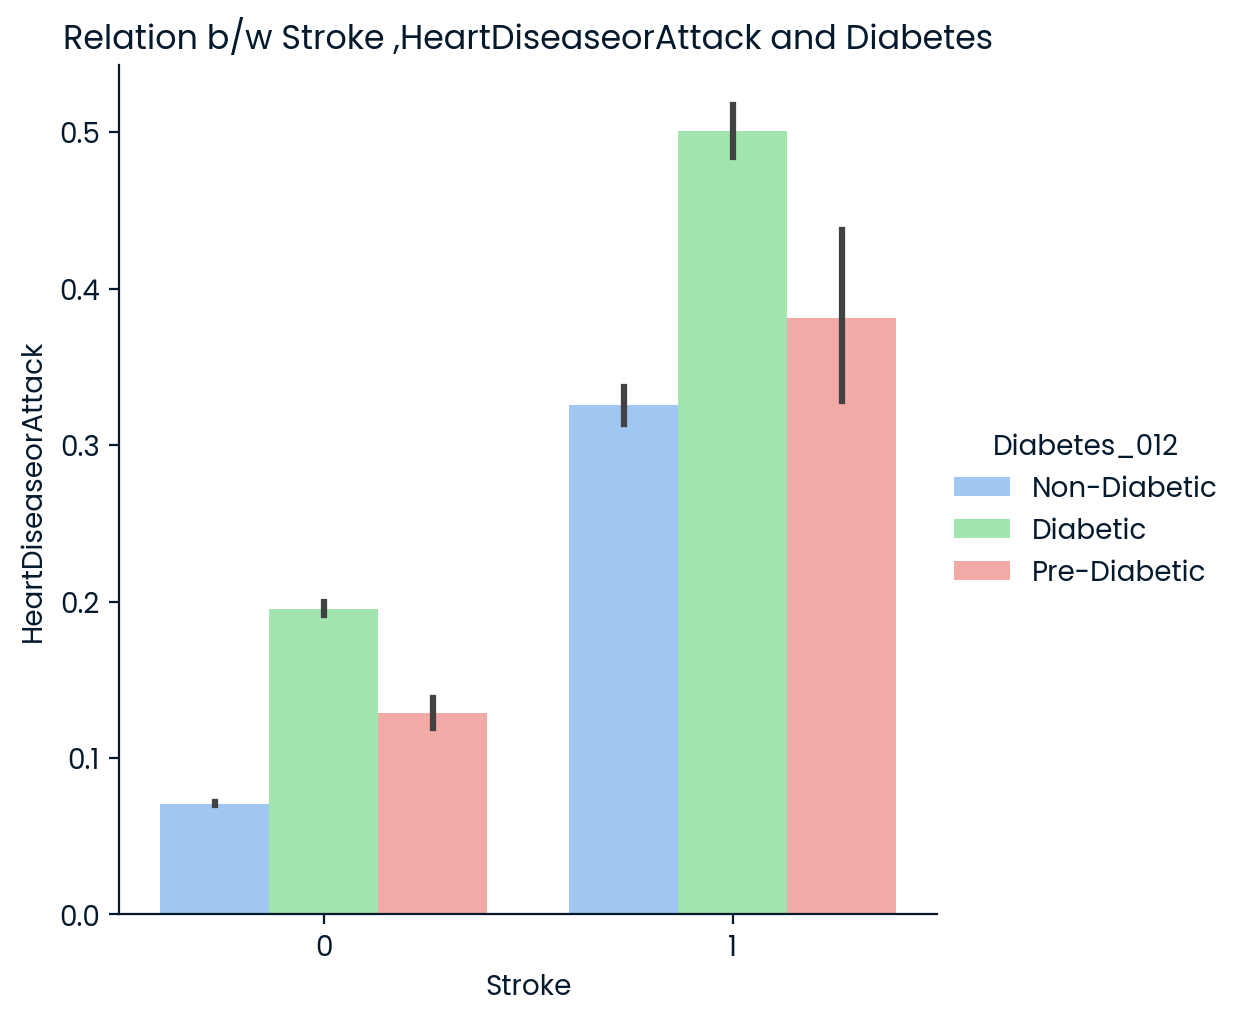

In [29]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_012"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

Effect of Heart Disease and Stroke both collectively increase the risk of Diabetes

Text(0.5, 1.0, 'Relation b/w GenHlth and Diabetes')

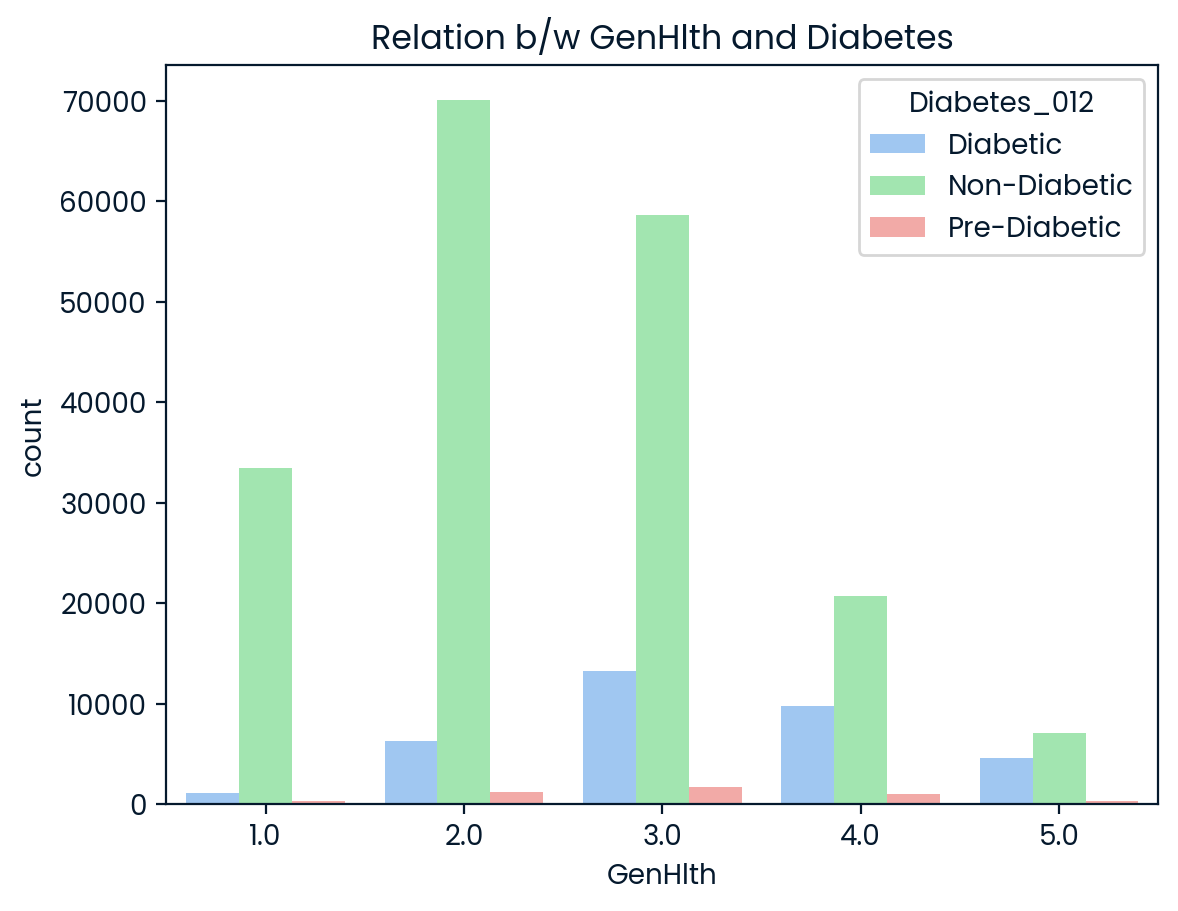

In [30]:
sns.countplot(x = df["GenHlth"],data = df,  hue = "Diabetes_012")   
plt.title("Relation b/w GenHlth and Diabetes")

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0
Veggies,229781.0,0.794813,0.403839,0.0,1.0,1.0,1.0,1.0


# Preprocessing

## Feature Scaling

BMI: The BMI feature has a wide range (min: 12.0, max: 98.0). Since it's a numeric feature with varying scales, it should be scaled.

GenHlth: This feature ranges from 1.0 to 5.0, representing different health states. Though the range is relatively small, scaling might still help in models sensitive to feature scales (like k-NN or SVM).

MentHlth and PhysHlth: These features have a range from 0 to 30, indicating the number of unhealthy days. Scaling can ensure these features don't dominate models like Logistic Regression.

Age: The Age feature ranges from 1.0 to 13.0. Even though the range is smaller, normalizing it can be beneficial for models sensitive to scale.

Income: The Income feature ranges from 1.0 to 8.0. This feature might also benefit from scaling, especially if it's used alongside other features with smaller ranges.

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']] = scaler.fit_transform(df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']])

In [33]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Non-Diabetic,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,1.00,0.6,0.5,1,0,0.666667,4.0,0.285714
1,Non-Diabetic,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0.50,0.0,0.0,0,0,0.500000,6.0,0.000000
2,Non-Diabetic,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,1.00,1.0,1.0,1,0,0.666667,4.0,1.000000
3,Non-Diabetic,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,0.25,0.0,0.0,0,0,0.833333,3.0,0.714286
4,Non-Diabetic,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,0.25,0.1,0.0,0,0,0.833333,5.0,0.428571


## Handling Class Imbalance

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts())

Original dataset shape: Non-Diabetic    133038
Diabetic         24568
Pre-Diabetic      3240
Name: Diabetes_012, dtype: int64
Resampled dataset shape: Non-Diabetic    133038
Diabetic        133038
Pre-Diabetic    133038
Name: Diabetes_012, dtype: int64


In [35]:
print(f"Training Features Shape: {X_resampled.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_resampled.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Training Features Shape: (399114, 21)
Test Features Shape: (68935, 21)
Training Labels Shape: (399114,)
Test Labels Shape: (68935,)


# Modeling

## Training and Evaluation

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Passive Aggressive": PassiveAggressiveClassifier(C=1, max_iter=1000),
    "Neural Network (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam'),
    "DNN (5 hidden layers)": MLPClassifier(hidden_layer_sizes=(64, 64, 32, 32, 16), max_iter=500, activation='relu', solver='adam', alpha=0.0001),
    "SVM": SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
}

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Handle multiclass probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None
    
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # For multiclass F1 and recall, specify the average parameter
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Initialize roc_auc and roc_auc_value for multiclass
    roc_auc = np.nan
    roc_auc_value = None
    
    if y_prob is not None:
        # Binarize the output for multiclass ROC AUC
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        y_prob_binarized = y_prob
        
        # Compute ROC AUC for each class
        roc_auc = {}
        for i in range(y_test_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_binarized[:, i])
            roc_auc[i] = auc(fpr, tpr)
        
        # Average ROC AUC for the multiclass setting
        roc_auc_value = np.mean(list(roc_auc.values()))
    
    return {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "f1_score": f1,
        "recall": recall,
        "roc_auc": roc_auc_value,
        "roc_auc_per_class": roc_auc
    }


In [39]:
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating K-Nearest Neighbour...
Evaluating Gradient Boosting...
Evaluating Passive Aggressive...
Evaluating Neural Network (1 layer)...
Evaluating DNN (5 hidden layers)...
Evaluating SVM...


In [40]:
results_df = pd.DataFrame.from_dict({
    model_name: {
        "Accuracy": result["accuracy"],
        "F1 Score": result["f1_score"],
        "Recall": result["recall"],
        "ROC AUC": result["roc_auc"]
    }
    for model_name, result in results.items()
}, orient='index')

In [41]:
results_df

,Accuracy,F1 Score,Recall,ROC AUC
Decision Tree,0.831029,0.790667,0.831029,0.743416
Random Forest,0.835338,0.789327,0.835338,0.758720
Naive Bayes,0.737637,0.756580,0.737637,0.720240
Logistic Regression,0.831914,0.789704,0.831914,0.762046
K-Nearest Neighbour,0.810242,0.776356,0.810242,0.653990
Gradient Boosting,0.835715,0.795729,0.835715,0.770757
Passive Aggressive,0.717604,0.744266,0.717604,NaN
Neural Network (1 layer),0.834656,0.793539,0.834656,0.767834
DNN (5 hidden layers),0.825401,0.791632,0.825401,0.728157
SVM,0.829245,0.757812,0.829245,0.653111


#### Gradient Boosting Classifier performs the best with 79.57 F1 Score followed by Neural Network with 1 hidden layer.